In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("data_set.csv")

In [3]:
data.head(5)

,PREFERENCE,PROPERTY_TYPE,CITY,LOCALITY,TRANSACT_TYPE,OWNTYPE,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,FURNISH,FACING,AGE,FLOOR_NUM,TOTAL_FLOOR,MAX_PRICE,PRICE_SQFT,LISTING,AMENITIES
0,S,Residential Apartment,Gurgaon,Sector 84 Gurgaon,1.0,1,4.0,4,4.0,4,1,2,14,26.0,26300000,8766,R,"20,21,32,23,46,47,39,1,6,9,40,41,30,42,33,12,2..."
1,S,Residential Apartment,Gurgaon,Sector 81 Gurgaon,1.0,1,4.0,4,3.0,4,1,1,7,29.0,36000000,21176,R,"17,5,20,21,10,44,23,46,47,29,19,1,6,9,30,41,43..."
2,R,Residential Apartment,Gurgaon,Sector 66 Gurgaon,NaN,0,3.0,3,2.0,1,4,1,7,17.0,85000,43,R,"32,17,2,5,20,21,44,23,45,24,46,47,28,29,30,39,..."
3,S,Residential Apartment,Gurgaon,Sector 112 Gurgaon,1.0,1,3.0,3,3.0,4,0,1,14,28.0,38500000,13740,R,"2,5,20,21,23,1,6,9,40,30,41,33,12,25,26,3,31,1..."
4,R,Residential Apartment,Gurgaon,Sector 104 Gurgaon,NaN,0,3.0,4,4.0,4,6,1,12,27.0,40000,17,R,"2,20,21,44,23,46,28,1,6,9,40,30,41,12,25,26,3,31"


In [4]:
data['LISTING'].unique()

array(['R', 'P'], dtype=object)

In [5]:
data.shape

(10704, 18)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10704 entries, 0 to 10703
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PREFERENCE     10704 non-null  object 
 1   PROPERTY_TYPE  10704 non-null  object 
 2   CITY           10704 non-null  object 
 3   LOCALITY       10704 non-null  object 
 4   TRANSACT_TYPE  10152 non-null  float64
 5   OWNTYPE        10704 non-null  int64  
 6   BEDROOM_NUM    10511 non-null  float64
 7   BATHROOM_NUM   10704 non-null  int64  
 8   BALCONY_NUM    10501 non-null  float64
 9   FURNISH        10704 non-null  int64  
 10  FACING         10704 non-null  int64  
 11  AGE            10704 non-null  int64  
 12  FLOOR_NUM      9804 non-null   object 
 13  TOTAL_FLOOR    10697 non-null  float64
 14  MAX_PRICE      10704 non-null  int64  
 15  PRICE_SQFT     10704 non-null  int64  
 16  LISTING        10704 non-null  object 
 17  AMENITIES      10620 non-null  object 
dtypes: flo

In [7]:
data.select_dtypes(include=("int64","float64")).columns

Index(['TRANSACT_TYPE', 'OWNTYPE', 'BEDROOM_NUM', 'BATHROOM_NUM',
       'BALCONY_NUM', 'FURNISH', 'FACING', 'AGE', 'TOTAL_FLOOR', 'MAX_PRICE',
       'PRICE_SQFT'],
      dtype='object')

In [8]:
data.select_dtypes(include=("object")).columns

Index(['PREFERENCE', 'PROPERTY_TYPE', 'CITY', 'LOCALITY', 'FLOOR_NUM',
       'LISTING', 'AMENITIES'],
      dtype='object')

In [9]:
#Descriptive statistics-numerical data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
TRANSACT_TYPE,10152.0,1.001182e+00,3.436208e-02,1.0,1.0,1.0,1.0,2.000000e+00
OWNTYPE,10704.0,9.686099e-01,3.043570e-01,0.0,1.0,1.0,1.0,4.000000e+00
BEDROOM_NUM,10511.0,3.327181e+00,1.288234e+00,1.0,3.0,3.0,4.0,2.200000e+01
BATHROOM_NUM,10704.0,3.484118e+00,1.518250e+00,0.0,3.0,3.0,4.0,2.200000e+01
BALCONY_NUM,10501.0,2.930959e+00,9.160446e-01,0.0,2.0,3.0,4.0,4.000000e+00
FURNISH,10704.0,3.298954e+00,1.231244e+00,0.0,2.0,4.0,4.0,4.000000e+00
FACING,10704.0,3.460762e+00,2.049320e+00,0.0,1.0,3.0,5.0,8.000000e+00
AGE,10704.0,3.228886e+00,2.154224e+00,0.0,1.0,2.0,6.0,6.000000e+00
TOTAL_FLOOR,10697.0,1.478714e+01,1.135374e+01,0.0,4.0,14.0,22.0,5.100000e+01
MAX_PRICE,10704.0,3.184388e+07,5.168949e+07,0.0,13892750.0,22000000.0,37000000.0,2.147484e+09


In [10]:
#Descriptive statistics-objective data
data.describe(include="object").T

,count,unique,top,freq
PREFERENCE,10704,2,S,10155
PROPERTY_TYPE,10704,4,Residential Apartment,6999
CITY,10704,1,Gurgaon,10704
LOCALITY,10704,231,Sector 65 Gurgaon,358
FLOOR_NUM,9804,47,2,1306
LISTING,10704,2,R,10118
AMENITIES,10620,6257,"5,17,20,21,23,24,6,19,101,102,103",309


In [11]:
data.isnull().sum()/data.shape[0]*100

PREFERENCE       0.000000
PROPERTY_TYPE    0.000000
CITY             0.000000
LOCALITY         0.000000
TRANSACT_TYPE    5.156951
OWNTYPE          0.000000
BEDROOM_NUM      1.803064
BATHROOM_NUM     0.000000
BALCONY_NUM      1.896487
FURNISH          0.000000
FACING           0.000000
AGE              0.000000
FLOOR_NUM        8.408072
TOTAL_FLOOR      0.065396
MAX_PRICE        0.000000
PRICE_SQFT       0.000000
LISTING          0.000000
AMENITIES        0.784753
dtype: float64

In [12]:
# correlation metrics
corr=data.select_dtypes(include=("int64","float64")).corr()

<Axes: >

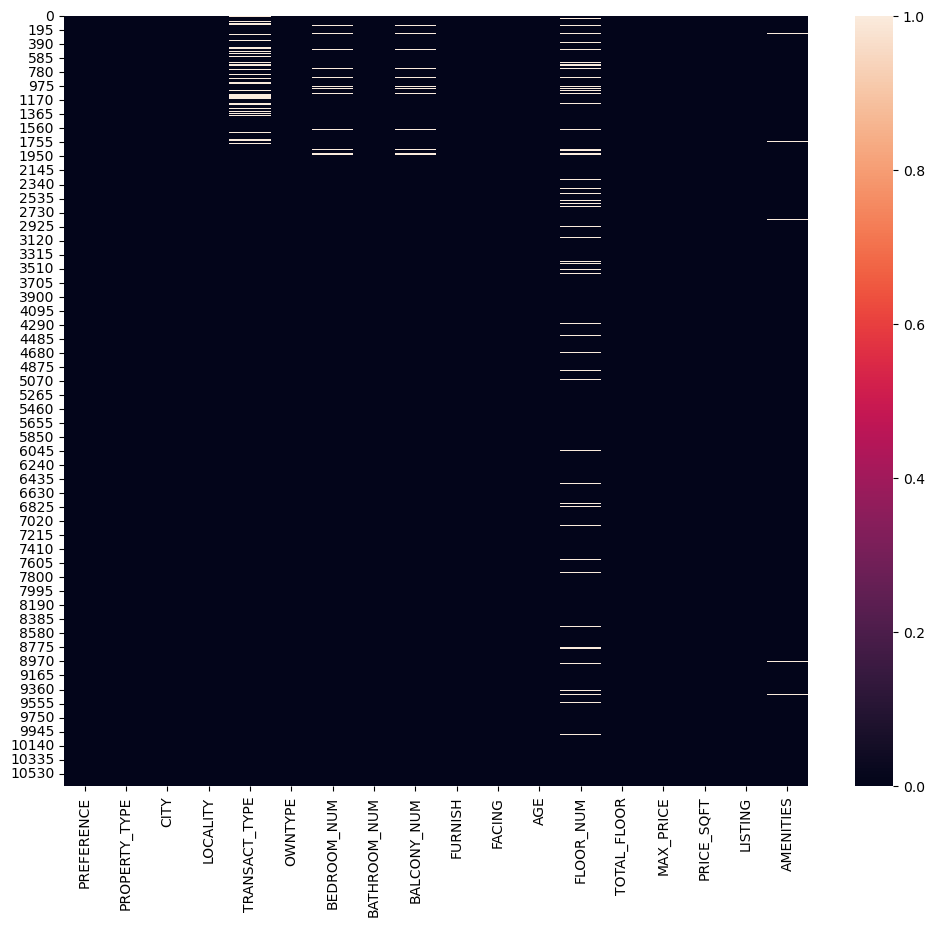

In [13]:
# heatmap for correlation metrics
plt.figure(figsize=(12,10))
sns.heatmap(data.isnull())

In [14]:
# Data Cleaning
# Handle missing values

In [15]:
data["TRANSACT_TYPE"].unique()

array([ 1., nan,  2.])

In [16]:
data["BALCONY_NUM"].unique()

array([ 4.,  3.,  2., nan,  0.,  1.])

In [17]:
data["BEDROOM_NUM"].unique()

array([ 4.,  3.,  2., nan,  5.,  6.,  7., 19.,  1.,  8.,  9., 10., 12.,
       11., 16., 18., 17., 20., 22., 14., 21.])

In [18]:
data["TOTAL_FLOOR"].unique()

array([26., 29., 17., 28., 27., 30.,  3.,  2., 39., 21., 20., 14., 42.,
        4., 36., 40., 32., 12.,  1.,  9., 13., 15., 11., 25., 34., 18.,
       51., 38., 24., 19., 22., 35., 16., 23., 48.,  7., 45., 10.,  5.,
       33.,  8., 31.,  6., nan, 41., 43., 47.,  0., 37., 44., 50.])

In [19]:
data['FLOOR_NUM'].unique()

array(['14', '7', '12', '4', nan, 'G', '39', '16', '1', '10', '2', '33',
       '8', '5', '9', '6', '3', '11', '25', '18', '30', '13', '29', '15',
       '28', '19', '48', '38', '36', '37', '20', '17', '45', '24', '22',
       '21', '23', '27', 'L', '35', '26', '32', '34', '40', '0', '31',
       'B', '42'], dtype=object)

In [20]:
# Handle missing values - fill with median for numerical and mode for categorical
data['TRANSACT_TYPE'] = data['TRANSACT_TYPE'].fillna(data['TRANSACT_TYPE'].mode()[0])
data['BALCONY_NUM'] = data['BALCONY_NUM'].fillna(data['BALCONY_NUM'].median())
data['BEDROOM_NUM'] = data['BEDROOM_NUM'].fillna(data['BEDROOM_NUM'].median())
data['FLOOR_NUM'] = data['FLOOR_NUM'].fillna('0')
data['TOTAL_FLOOR'] = data['TOTAL_FLOOR'].fillna(data['TOTAL_FLOOR'].median())

In [21]:
for i, x in enumerate(data["FLOOR_NUM"]):
    if x.isdigit():
        data["FLOOR_NUM"].iloc[i] = str(int(x) + 2)
    elif x == 'B':
        data["FLOOR_NUM"].iloc[i] = '0'
    elif x == 'L':
        data["FLOOR_NUM"].iloc[i] = '1'
    elif x == 'G':
        data["FLOOR_NUM"].iloc[i] = '2'

In [22]:
data["FLOOR_NUM"] = data["FLOOR_NUM"].astype(int)

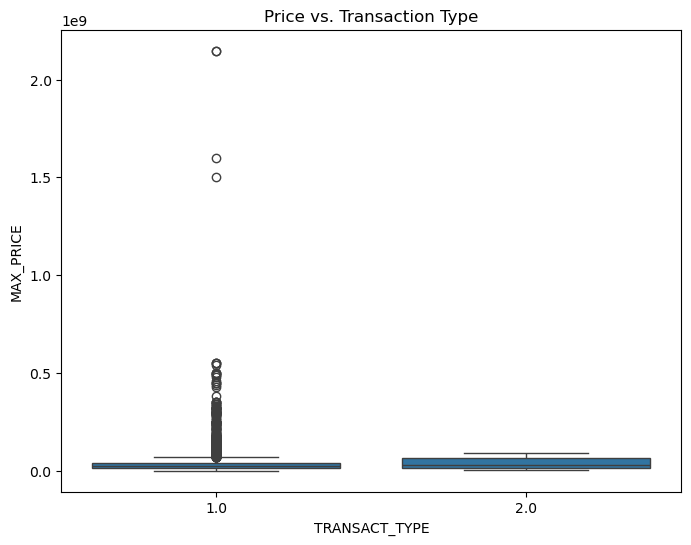

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='TRANSACT_TYPE', y='MAX_PRICE', data=data)
plt.title('Price vs. Transaction Type')
plt.show()

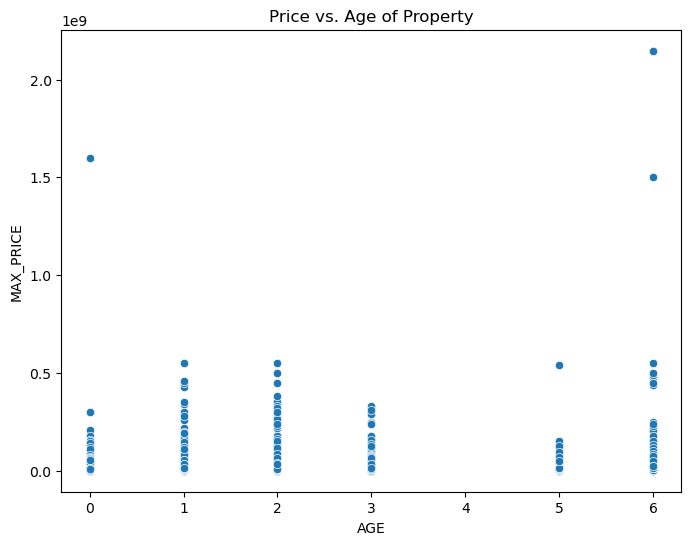

In [24]:
# 5. Price vs. Age
plt.figure(figsize=(8, 6))
sns.scatterplot(x='AGE', y='MAX_PRICE', data=data)
plt.title('Price vs. Age of Property')
plt.show()

In [25]:
def outlier__removal(data):
    q1,q3=np.percentile(data,[25,75])
    iqr=q3-q1
    lower_fence=q1-iqr*1.5
    upper_fence=q3+iqr*1.5
    return(lower_fence,upper_fence)

In [26]:
for i in ['TRANSACT_TYPE', 'OWNTYPE', 'BEDROOM_NUM', 'BATHROOM_NUM',
       'BALCONY_NUM', 'FURNISH', 'FACING', 'AGE', 'TOTAL_FLOOR', 'MAX_PRICE',
       'PRICE_SQFT',"FLOOR_NUM"]:
    lower_fence,upper_fence=outlier__removal(data[i])
    data[i]=np.where(data[i]<lower_fence,lower_fence,data[i])
    data[i]=np.where(data[i]>upper_fence,upper_fence,data[i])

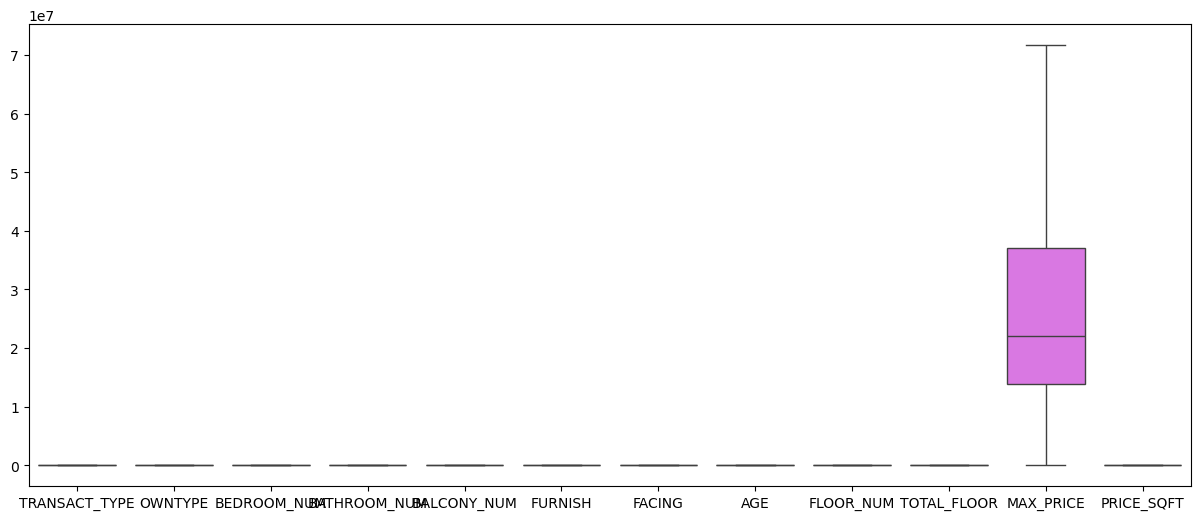

In [27]:
plt.figure(figsize=(15,6))
sns.boxplot(data=data)
plt.show()

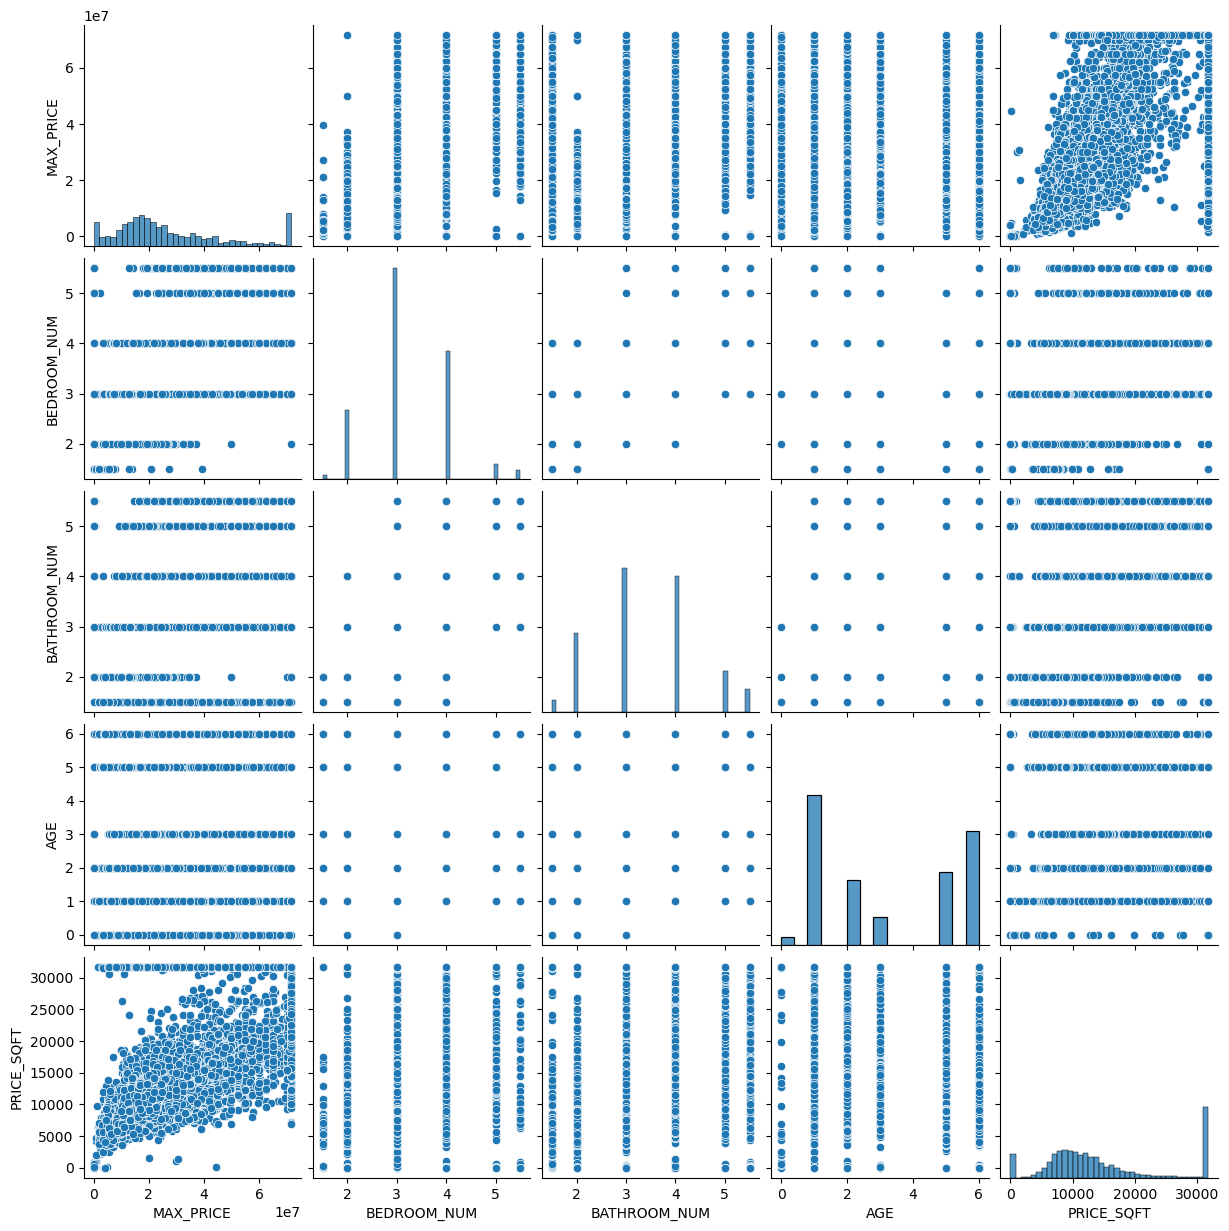

In [28]:
sns.pairplot(data[['MAX_PRICE', 'BEDROOM_NUM', 'BATHROOM_NUM', 'AGE', 'PRICE_SQFT']])
plt.show()

In [29]:
data["FLOOR_NUM"].unique()

array([16.,  9., 14.,  6.,  2., 24., 18.,  3., 12.,  4., 10.,  7., 11.,
        8.,  5., 13., 20., 15., 17., 21., 22., 19., 23.,  1.,  0.])

In [30]:
data["AMENITIES"] = data["AMENITIES"].apply(lambda x: list(map(int, x.split(','))) if isinstance(x, str) else [])

In [31]:
data.head()

,PREFERENCE,PROPERTY_TYPE,CITY,LOCALITY,TRANSACT_TYPE,OWNTYPE,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,FURNISH,FACING,AGE,FLOOR_NUM,TOTAL_FLOOR,MAX_PRICE,PRICE_SQFT,LISTING,AMENITIES
0,S,Residential Apartment,Gurgaon,Sector 84 Gurgaon,1.0,1.0,4.0,4.0,4.0,4.0,1.0,2.0,16.0,26.0,26300000.0,8766.0,R,"[20, 21, 32, 23, 46, 47, 39, 1, 6, 9, 40, 41, ..."
1,S,Residential Apartment,Gurgaon,Sector 81 Gurgaon,1.0,1.0,4.0,4.0,3.0,4.0,1.0,1.0,9.0,29.0,36000000.0,21176.0,R,"[17, 5, 20, 21, 10, 44, 23, 46, 47, 29, 19, 1,..."
2,R,Residential Apartment,Gurgaon,Sector 66 Gurgaon,1.0,1.0,3.0,3.0,2.0,1.0,4.0,1.0,9.0,17.0,85000.0,43.0,R,"[32, 17, 2, 5, 20, 21, 44, 23, 45, 24, 46, 47,..."
3,S,Residential Apartment,Gurgaon,Sector 112 Gurgaon,1.0,1.0,3.0,3.0,3.0,4.0,0.0,1.0,16.0,28.0,38500000.0,13740.0,R,"[2, 5, 20, 21, 23, 1, 6, 9, 40, 30, 41, 33, 12..."
4,R,Residential Apartment,Gurgaon,Sector 104 Gurgaon,1.0,1.0,3.0,4.0,4.0,4.0,6.0,1.0,14.0,27.0,40000.0,17.0,R,"[2, 20, 21, 44, 23, 46, 28, 1, 6, 9, 40, 30, 4..."


In [32]:
amenities_data=pd.read_csv("Facets/AMENITIES.csv")
data_Amenities=data.assign(AMENITIES=data["AMENITIES"]).explode('AMENITIES')

In [33]:
amenities_data['category']=amenities_data['category'].fillna("Other Features")
merge_Amenitie=pd.merge(data_Amenities,amenities_data,left_on='AMENITIES',right_on="id")

In [34]:
data=merge_Amenitie.drop(['id'],axis=1)
data.rename(columns={ 'label': 'AMENITIES_LABEL',"type":"AMENITIES_TYPES","category":"AMENITIES_CATEGORY","MAX_PRICE":"PRICE"}, inplace=True)

In [35]:
data.head(5)

,PREFERENCE,PROPERTY_TYPE,CITY,LOCALITY,TRANSACT_TYPE,OWNTYPE,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,FURNISH,...,AGE,FLOOR_NUM,TOTAL_FLOOR,PRICE,PRICE_SQFT,LISTING,AMENITIES,AMENITIES_CATEGORY,AMENITIES_TYPES,AMENITIES_LABEL
0,S,Residential Apartment,Gurgaon,Sector 84 Gurgaon,1.0,1.0,4.0,4.0,4.0,4.0,...,2.0,16.0,26.0,26300000.0,8766.0,R,20,Property Feature,FEATURES_RESIDENTIAL,Intercom Facility
1,S,Residential Apartment,Gurgaon,Sector 84 Gurgaon,1.0,1.0,4.0,4.0,4.0,4.0,...,2.0,16.0,26.0,26300000.0,8766.0,R,21,Society/Building Feature,FEATURES_RESIDENTIAL,Lift(s)
2,S,Residential Apartment,Gurgaon,Sector 84 Gurgaon,1.0,1.0,4.0,4.0,4.0,4.0,...,2.0,16.0,26.0,26300000.0,8766.0,R,32,Property Feature,FEATURES_RESIDENTIAL,Water purifier
3,S,Residential Apartment,Gurgaon,Sector 84 Gurgaon,1.0,1.0,4.0,4.0,4.0,4.0,...,2.0,16.0,26.0,26300000.0,8766.0,R,23,Society/Building Feature,FEATURES_RESIDENTIAL,Maintenance Staff
4,S,Residential Apartment,Gurgaon,Sector 84 Gurgaon,1.0,1.0,4.0,4.0,4.0,4.0,...,2.0,16.0,26.0,26300000.0,8766.0,R,39,Property Feature,FEATURES_COMMERCIAL,Near Bank


In [37]:
locality_data=pd.read_csv("Facets/LOCALITY_ID.csv")
data_locality=data.assign(LOCALITY=data["LOCALITY"]).explode('LOCALITY')
merge_locality=pd.merge(data_locality,locality_data,left_on='LOCALITY',right_on="label")
data=merge_locality.drop(['label','LOCALITY'],axis=1)

In [38]:
data.rename(columns={ 'id': 'LOCALITY'}, inplace=True)

In [39]:
data.head(5)

,PREFERENCE,PROPERTY_TYPE,CITY,TRANSACT_TYPE,OWNTYPE,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,FURNISH,FACING,...,FLOOR_NUM,TOTAL_FLOOR,PRICE,PRICE_SQFT,LISTING,AMENITIES,AMENITIES_CATEGORY,AMENITIES_TYPES,AMENITIES_LABEL,LOCALITY
0,S,Residential Apartment,Gurgaon,1.0,1.0,4.0,4.0,4.0,4.0,1.0,...,16.0,26.0,26300000.0,8766.0,R,20,Property Feature,FEATURES_RESIDENTIAL,Intercom Facility,7580
1,S,Residential Apartment,Gurgaon,1.0,1.0,4.0,4.0,4.0,4.0,1.0,...,16.0,26.0,26300000.0,8766.0,R,21,Society/Building Feature,FEATURES_RESIDENTIAL,Lift(s),7580
2,S,Residential Apartment,Gurgaon,1.0,1.0,4.0,4.0,4.0,4.0,1.0,...,16.0,26.0,26300000.0,8766.0,R,32,Property Feature,FEATURES_RESIDENTIAL,Water purifier,7580
3,S,Residential Apartment,Gurgaon,1.0,1.0,4.0,4.0,4.0,4.0,1.0,...,16.0,26.0,26300000.0,8766.0,R,23,Society/Building Feature,FEATURES_RESIDENTIAL,Maintenance Staff,7580
4,S,Residential Apartment,Gurgaon,1.0,1.0,4.0,4.0,4.0,4.0,1.0,...,16.0,26.0,26300000.0,8766.0,R,39,Property Feature,FEATURES_COMMERCIAL,Near Bank,7580


In [40]:
data=data.drop(['AMENITIES','AMENITIES_LABEL'],axis=1)

In [41]:
data = pd.get_dummies(data, columns=['PROPERTY_TYPE','AMENITIES_TYPES','CITY'],drop_first=True)

In [42]:
PREFERENCE_encoder = OrdinalEncoder(categories=[['R', 'S']])
data['PREFERENCE'] = PREFERENCE_encoder.fit_transform(data[['PREFERENCE']])

In [43]:
LISTING_encoder = OrdinalEncoder(categories=[['R', 'P']])
data['LISTING'] = LISTING_encoder.fit_transform(data[['LISTING']])

In [44]:
AMENITIES_CATEGORY_encoder = OrdinalEncoder(categories=[['Property Feature', 'Society/Building Feature', 'Other Features']])
data['AMENITIES_CATEGORY'] = AMENITIES_CATEGORY_encoder.fit_transform(data[['AMENITIES_CATEGORY']])

In [45]:
data

,PREFERENCE,TRANSACT_TYPE,OWNTYPE,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,FURNISH,FACING,AGE,FLOOR_NUM,TOTAL_FLOOR,PRICE,PRICE_SQFT,LISTING,AMENITIES_CATEGORY,LOCALITY,PROPERTY_TYPE_Independent/Builder Floor,PROPERTY_TYPE_Residential Apartment,PROPERTY_TYPE_Residential Land,AMENITIES_TYPES_FEATURES_RESIDENTIAL
0,1.0,1.0,1.0,4.0,4.0,4.0,4.0,1.0,2.0,16.0,26.0,26300000.0,8766.0,0.0,0.0,7580,False,True,False,True
1,1.0,1.0,1.0,4.0,4.0,4.0,4.0,1.0,2.0,16.0,26.0,26300000.0,8766.0,0.0,1.0,7580,False,True,False,True
2,1.0,1.0,1.0,4.0,4.0,4.0,4.0,1.0,2.0,16.0,26.0,26300000.0,8766.0,0.0,0.0,7580,False,True,False,True
3,1.0,1.0,1.0,4.0,4.0,4.0,4.0,1.0,2.0,16.0,26.0,26300000.0,8766.0,0.0,1.0,7580,False,True,False,True
4,1.0,1.0,1.0,4.0,4.0,4.0,4.0,1.0,2.0,16.0,26.0,26300000.0,8766.0,0.0,0.0,7580,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127396,1.0,1.0,1.0,3.0,3.0,3.0,2.0,1.0,5.0,3.0,4.0,48000000.0,15000.0,0.0,0.0,12536,True,False,False,True
127397,1.0,1.0,1.0,3.0,3.0,3.0,2.0,1.0,5.0,3.0,4.0,48000000.0,15000.0,0.0,1.0,12536,True,False,False,True
127398,1.0,1.0,1.0,3.0,3.0,3.0,2.0,1.0,5.0,3.0,4.0,48000000.0,15000.0,0.0,1.0,12536,True,False,False,True
127399,1.0,1.0,1.0,3.0,3.0,3.0,2.0,1.0,5.0,3.0,4.0,48000000.0,15000.0,0.0,2.0,12536,True,False,False,True


In [46]:
data.drop_duplicates()

,PREFERENCE,TRANSACT_TYPE,OWNTYPE,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,FURNISH,FACING,AGE,FLOOR_NUM,TOTAL_FLOOR,PRICE,PRICE_SQFT,LISTING,AMENITIES_CATEGORY,LOCALITY,PROPERTY_TYPE_Independent/Builder Floor,PROPERTY_TYPE_Residential Apartment,PROPERTY_TYPE_Residential Land,AMENITIES_TYPES_FEATURES_RESIDENTIAL
0,1.0,1.0,1.0,4.0,4.0,4.0,4.0,1.0,2.0,16.0,26.0,26300000.0,8766.0,0.0,0.0,7580,False,True,False,True
1,1.0,1.0,1.0,4.0,4.0,4.0,4.0,1.0,2.0,16.0,26.0,26300000.0,8766.0,0.0,1.0,7580,False,True,False,True
4,1.0,1.0,1.0,4.0,4.0,4.0,4.0,1.0,2.0,16.0,26.0,26300000.0,8766.0,0.0,0.0,7580,False,True,False,False
8,1.0,1.0,1.0,4.0,4.0,4.0,4.0,1.0,2.0,16.0,26.0,26300000.0,8766.0,0.0,1.0,7580,False,True,False,False
10,1.0,1.0,1.0,4.0,4.0,4.0,4.0,1.0,2.0,16.0,26.0,26300000.0,8766.0,0.0,2.0,7580,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127388,1.0,1.0,1.0,3.0,2.0,4.0,4.0,3.0,5.0,12.0,33.0,13000000.0,8965.0,0.0,1.0,8183,False,True,False,False
127391,1.0,1.0,1.0,3.0,3.0,3.0,2.0,1.0,5.0,3.0,4.0,48000000.0,15000.0,0.0,0.0,12536,True,False,False,True
127393,1.0,1.0,1.0,3.0,3.0,3.0,2.0,1.0,5.0,3.0,4.0,48000000.0,15000.0,0.0,0.0,12536,True,False,False,False
127394,1.0,1.0,1.0,3.0,3.0,3.0,2.0,1.0,5.0,3.0,4.0,48000000.0,15000.0,0.0,1.0,12536,True,False,False,True


In [47]:
data=data.replace({True: 1, False: 0})

In [48]:
data

,PREFERENCE,TRANSACT_TYPE,OWNTYPE,BEDROOM_NUM,BATHROOM_NUM,BALCONY_NUM,FURNISH,FACING,AGE,FLOOR_NUM,TOTAL_FLOOR,PRICE,PRICE_SQFT,LISTING,AMENITIES_CATEGORY,LOCALITY,PROPERTY_TYPE_Independent/Builder Floor,PROPERTY_TYPE_Residential Apartment,PROPERTY_TYPE_Residential Land,AMENITIES_TYPES_FEATURES_RESIDENTIAL
0,1.0,1.0,1.0,4.0,4.0,4.0,4.0,1.0,2.0,16.0,26.0,26300000.0,8766.0,0.0,0.0,7580,0,1,0,1
1,1.0,1.0,1.0,4.0,4.0,4.0,4.0,1.0,2.0,16.0,26.0,26300000.0,8766.0,0.0,1.0,7580,0,1,0,1
2,1.0,1.0,1.0,4.0,4.0,4.0,4.0,1.0,2.0,16.0,26.0,26300000.0,8766.0,0.0,0.0,7580,0,1,0,1
3,1.0,1.0,1.0,4.0,4.0,4.0,4.0,1.0,2.0,16.0,26.0,26300000.0,8766.0,0.0,1.0,7580,0,1,0,1
4,1.0,1.0,1.0,4.0,4.0,4.0,4.0,1.0,2.0,16.0,26.0,26300000.0,8766.0,0.0,0.0,7580,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127396,1.0,1.0,1.0,3.0,3.0,3.0,2.0,1.0,5.0,3.0,4.0,48000000.0,15000.0,0.0,0.0,12536,1,0,0,1
127397,1.0,1.0,1.0,3.0,3.0,3.0,2.0,1.0,5.0,3.0,4.0,48000000.0,15000.0,0.0,1.0,12536,1,0,0,1
127398,1.0,1.0,1.0,3.0,3.0,3.0,2.0,1.0,5.0,3.0,4.0,48000000.0,15000.0,0.0,1.0,12536,1,0,0,1
127399,1.0,1.0,1.0,3.0,3.0,3.0,2.0,1.0,5.0,3.0,4.0,48000000.0,15000.0,0.0,2.0,12536,1,0,0,1


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127401 entries, 0 to 127400
Data columns (total 20 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   PREFERENCE                               127401 non-null  float64
 1   TRANSACT_TYPE                            127401 non-null  float64
 2   OWNTYPE                                  127401 non-null  float64
 3   BEDROOM_NUM                              127401 non-null  float64
 4   BATHROOM_NUM                             127401 non-null  float64
 5   BALCONY_NUM                              127401 non-null  float64
 6   FURNISH                                  127401 non-null  float64
 7   FACING                                   127401 non-null  float64
 8   AGE                                      127401 non-null  float64
 9   FLOOR_NUM                                127401 non-null  float64
 10  TOTAL_FLOOR                     

In [50]:
data = data[data['PRICE_SQFT'] != 0]
print(data)

        PREFERENCE  TRANSACT_TYPE  OWNTYPE  BEDROOM_NUM  BATHROOM_NUM  \
0              1.0            1.0      1.0          4.0           4.0   
1              1.0            1.0      1.0          4.0           4.0   
2              1.0            1.0      1.0          4.0           4.0   
3              1.0            1.0      1.0          4.0           4.0   
4              1.0            1.0      1.0          4.0           4.0   
...            ...            ...      ...          ...           ...   
127396         1.0            1.0      1.0          3.0           3.0   
127397         1.0            1.0      1.0          3.0           3.0   
127398         1.0            1.0      1.0          3.0           3.0   
127399         1.0            1.0      1.0          3.0           3.0   
127400         1.0            1.0      1.0          3.0           3.0   

        BALCONY_NUM  FURNISH  FACING  AGE  FLOOR_NUM  TOTAL_FLOOR       PRICE  \
0               4.0      4.0     1.0  2.0 

In [51]:
X = data.drop(['PRICE'], axis=1)
y = data['PRICE']

In [52]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [53]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [55]:
# Make predictions
y_pred = model.predict(X_test_scaled)

In [56]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

In [57]:
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R²: {r_squared}')

Mean Absolute Error: 7815482.4548497405
Mean Squared Error: 110133781368418.62
R²: 0.7100175137654859


In [58]:
max_price = y_pred.max()
min_price = y_pred.min()

print(f'Max Predicted House Price: {max_price}')
print(f'Min Predicted House Price: {min_price}')

Max Predicted House Price: 81892788.2834606
Min Predicted House Price: -25628040.90142046


In [59]:
dt_model = DecisionTreeRegressor(random_state=42)  # You can adjust alpha
dt_model.fit(X_train_scaled, y_train)
dt_pred =dt_model.predict(X_test_scaled)

In [61]:
# Metrics for Lasso Regression
mae_dt = mean_absolute_error(y_test, dt_pred)
mse_dt= mean_squared_error(y_test, dt_pred)
r2_dt= r2_score(y_test, dt_pred)

In [62]:
print("Decision tree:")
print(f"Mean Absolute Error: {mae_dt}")
print(f"Mean Squared Error: {mse_dt}")
print(f"R-squared: {r2_dt}")

Decision tree:
Mean Absolute Error: 116207.80465721464
Mean Squared Error: 1751011837954.2034
R-squared: 0.9953895820166434


In [63]:
max_price =dt_pred.max()
min_price =dt_pred.min()

print(f'Max Predicted House Price: {max_price}')
print(f'Min Predicted House Price: {min_price}')

Max Predicted House Price: 71660875.0
Min Predicted House Price: 10000.0


In [64]:
rf_model = RandomForestRegressor(n_estimators=10, random_state=0)

In [65]:
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [66]:
rf_pred = rf_model.predict(X_test_scaled)


In [67]:
mae_rf = mean_absolute_error(y_test, rf_pred)
mse_rf = mean_squared_error(y_test, rf_pred)
r2_rf = r2_score(y_test, rf_pred)

In [68]:
print("\nRandom forest Metrics:")
print(f"Mean Absolute Error: {mae_rf}")
print(f"Mean Squared Error: {mse_rf}")
print(f"R-squared: {r2_rf}")


Random forest Metrics:
Mean Absolute Error: 148078.66866036053
Mean Squared Error: 1952848359128.4944
R-squared: 0.9948581460167547


In [69]:
max_price =rf_pred.max()
min_price =rf_pred.min()

print(f'Max Predicted House Price: {max_price}')
print(f'Min Predicted House Price: {min_price}')

Max Predicted House Price: 71660875.0
Min Predicted House Price: 10000.0


In [72]:
metrics = {
    'Random Forest': {'R²': 0.9980, 'MAE': 69638.2},
    'Decision tree': {'R²': 0.9954, 'MAE': 116207.8},
    'Linear Regression':{'R²': 0.7233,'MAE': 7559903.4}    
}
metrics_data = pd.DataFrame(metrics).T
metrics_data.reset_index(inplace=True)
metrics_data.columns = ['Model', 'R²', 'MAE']

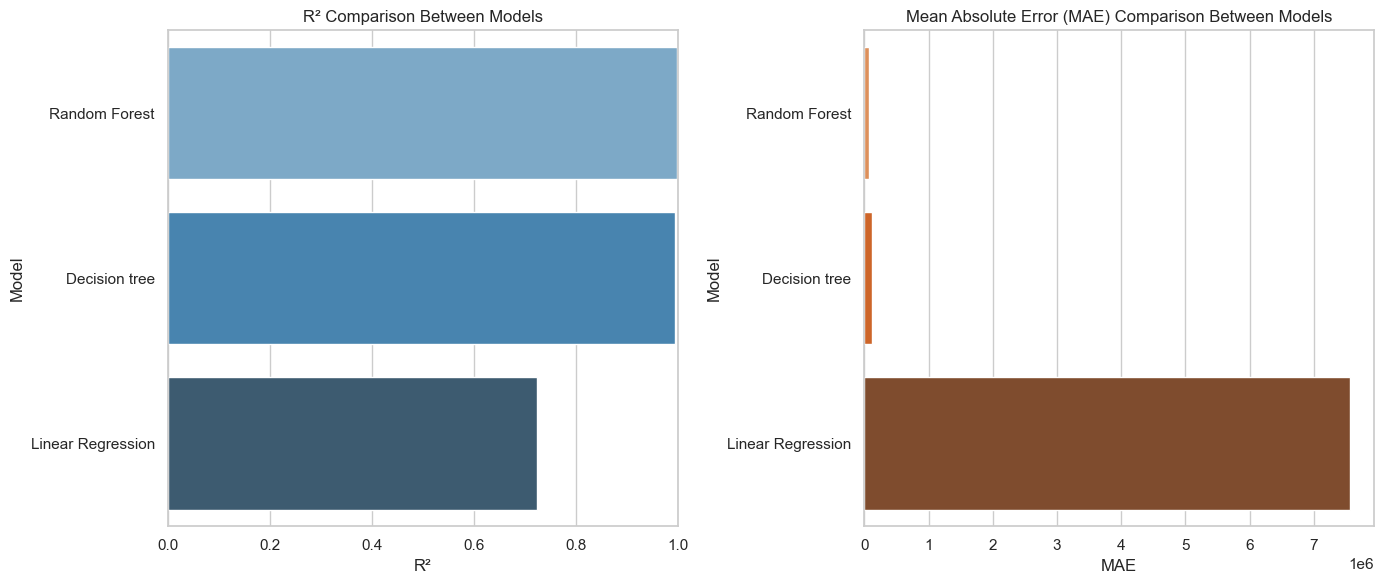

In [73]:
# Set plot style
sns.set(style="whitegrid")

# Create subplots for R² and MAE comparisons
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot R²
sns.barplot(x='R²', y='Model', data=metrics_data, ax=axes[0], palette='Blues_d')
axes[0].set_title('R² Comparison Between Models')
axes[0].set_xlim([0, 1])  # R² ranges from 0 to 1

# Plot MAE
sns.barplot(x='MAE', y='Model', data=metrics_data, ax=axes[1], palette='Oranges_d')
axes[1].set_title('Mean Absolute Error (MAE) Comparison Between Models')

# Display the plot
plt.tight_layout()
plt.show()